In [1]:
import numpy as np
np.random.seed(123)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [32]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

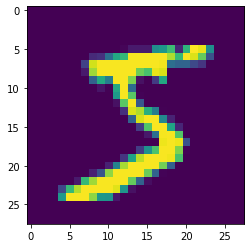

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

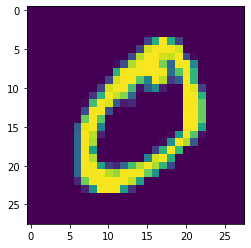

In [35]:
plt.imshow(X_train[1])

In [36]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])

print(X_train.shape)
print(X_test.shape)

(60000, 1, 28, 28)
(10000, 1, 28, 28)


In [37]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train[0][0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [38]:
X_train /= 255
X_test /= 255

In [52]:
y_train[0]

5

In [49]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test= np_utils.to_categorical(y_test, 10)

Y_train.shape

(60000, 10)

In [51]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Keras Architecture

In [53]:
model = Sequential()

In [57]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1, 28, 28), data_format='channels_first'))

In [58]:
model.output_shape

(None, 32, 26, 26)

In [60]:
model.add(Convolution2D(32, (3, 3), activation='relu'))

In [61]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [63]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [64]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 164s 3ms/step - loss: 0.2654 - accuracy: 0.9201
Epoch 2/10
60000/60000 [==============================] - 154s 3ms/step - loss: 0.1094 - accuracy: 0.9689
Epoch 3/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0823 - accuracy: 0.9751
Epoch 4/10
60000/60000 [==============================] - 148s 2ms/step - loss: 0.0653 - accuracy: 0.9808
Epoch 5/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0585 - accuracy: 0.9820
Epoch 6/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0510 - accuracy: 0.9848
Epoch 7/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0455 - accuracy: 0.9853
Epoch 8/10
60000/60000 [==============================] - 137s 2ms/step - loss: 0.0417 - accuracy: 0.9873
Epoch 9/10
60000/60000 [==============================] - 138s 2ms/step - loss: 0.0362 - accuracy: 0.9880
Epoch 10/10
60000/60000 [=====================

In [65]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [66]:
score

[0.03101332540906514, 0.9911999702453613]